In [7]:
# from consav import runtools
# runtools.write_numba_config(disable=0,threads=8)

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

# reload module each time cell is run
%load_ext autoreload
%autoreload 2

# load the BufferStockModel module
from BufferStockModel import BufferStockModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# a. setup 
model = BufferStockModelClass(name='baseline',par={'solmethod':'egm','do_simple_w':False})

# name: required
# **kwargs: par={}, update parameters in .par AFTER calling .setup

# b. print
# print('### print the model ###')
# print('')
# print(model)

# # c. solve
# print('### solve and simulate the model ###')
# print('')
model.solve()

# d. simulate
# print('')
# model.simulate()

# e. save
# model.save()

 t = 4 solved in 0.8 secs
 t = 3 solved in 3.4 secs (w: 1.8 secs)
 t = 2 solved in 0.0 secs (w: 0.0 secs)
 t = 1 solved in 0.0 secs (w: 0.0 secs)
 t = 0 solved in 0.0 secs (w: 0.0 secs)


In [10]:
model.varlist

par = model.par
sol = model.sol

In [11]:
import numpy as np

for varname in model.varlist:
    print(f'{varname:15s}: {sol.__dict__[varname[:1]]}')

l              : [[[1.09939324 1.09711527 1.09483895 ... 0.22747806 0.22567394 0.22364455]
  [1.31889132 1.31619865 1.31350803 ... 0.24523387 0.24315204 0.24081261]
  [1.58724983 1.58416607 1.58108259 ... 0.26698642 0.26454245 0.2617985 ]
  ...
  [1.09939276 1.09711479 1.09483847 ... 0.22747802 0.2256739  0.22364451]
  [1.09939276 1.09711479 1.09483847 ... 0.22747802 0.2256739  0.22364451]
  [1.09939276 1.09711479 1.09483847 ... 0.22747802 0.2256739  0.22364451]]

 [[1.13847962 1.13547748 1.13248006 ... 0.1881259  0.18658755 0.18485811]
  [1.35799598 1.35447192 1.35095122 ... 0.19948162 0.19775817 0.19582291]
  [1.6254167  1.62137959 1.61734936 ... 0.21295204 0.21099725 0.20880407]
  ...
  [1.13847913 1.135477   1.13247958 ... 0.18812587 0.18658752 0.18485809]
  [1.13847913 1.135477   1.13247958 ... 0.18812587 0.18658752 0.18485809]
  [1.13847913 1.135477   1.13247958 ... 0.18812587 0.18658752 0.18485809]]

 [[1.21079334 1.20634654 1.20191453 ... 0.14544728 0.14422723 0.14285657]
  [1.

[]

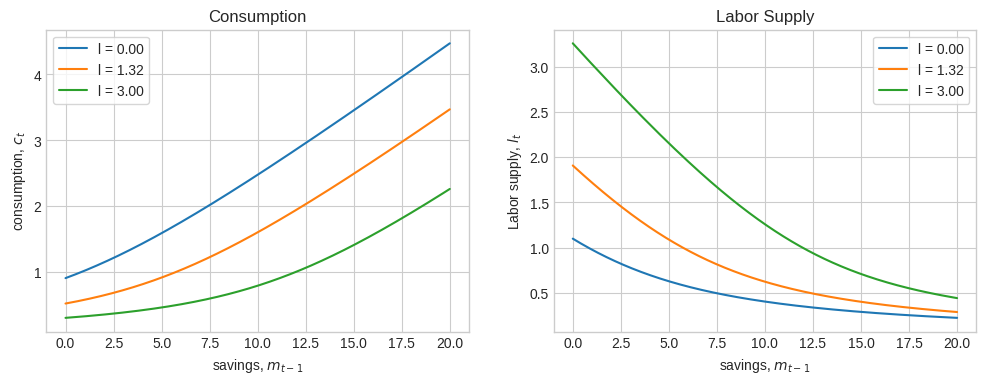

In [13]:
fig = plt.figure(figsize=(12,4),dpi=100)

I = par.grid_m < 500

# a. consumption
ax = fig.add_subplot(1,2,1)
ax.set_title(f'Consumption')

for i_z, l in enumerate(par.grid_l):
    if i_z % 3 == 0 or i_z == par.Nl-1:
        ax.plot(par.grid_m[I], sol.c[0, i_z, :][I], label=f'l = {l:.2f}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $m_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# Labor Supply
ax = fig.add_subplot(1,2,2)
ax.set_title(f'Labor Supply')

for i_z, l in enumerate(par.grid_l):
    if i_z % 3 == 0 or i_z == par.Nl-1:
        ax.plot(par.grid_m[I], sol.l[0, i_z, :][I], label=f'l = {l:.2f}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $m_{t-1}$')
ax.set_ylabel('Labor supply, $l_t$')

plt.plot()

In [ ]:

# b. saving
ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z,z in enumerate(par.grid_m):
    if i_z%3 == 0 or i_z == par.Nl-1:
        ax.plot(par.grid_a[I],sol.a[0,i_z,I]-par.grid_a[I],label=f'z = {z:.2f}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')

# Labor Supply

#fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,3,3)

ax.set_title(f'Labor Supply')

for i_z,z in enumerate(par.grid_m):
    if i_z%3 == 0 or i_z == par.Nl-1:
        ax.plot(par.grid_a[I],sol.l[0,i_z,I],label=f'z = {z:.2f}')

#ax.plot(par.grid_a,sol.l[0,i_z,I])

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('Labor supply, $l_t$')

fig.tight_layout()